# Assignment 5

In this assignment you'll explore more classification methods we cover in Chapter 8.


First, run the following block to set up the variables needed for later sections.

In [1]:
#import individual packages:
import pandas as pd
import numpy as np
import sklearn
from sklearn import (cluster,
                     datasets,
                     decomposition,
                     discriminant_analysis,
                     dummy,
                     ensemble,
                     feature_selection as ftr_sel,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     multiclass as skmulti,
                     naive_bayes,
                     neighbors,
                     pipeline,
                     preprocessing as skpre,
                     svm,
                     tree)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#or
from mlwpy import *

Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)
X_subset = X_test2
y_subset = y_test2

In [19]:
print(mush_df2.columns.tolist())

['class_e', 'class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y', 'stalk-surface-belo

## Part 1 - Decision Tree
### Question 1

Using `X_train2` and `y_train2` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the `X_train2.columns` property, and the order of the features in `X_train2.columns` matches the order of the feature importance values in the classifier's `feature_importances_` property. 


Cross Val Score:  [0.90546529 0.99778434 0.96011817]
[Text(0.5882352941176471, 0.9375, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6093\nvalue = [3147, 2946]'), Text(0.35294117647058826, 0.8125, 'x[53] <= 0.5\ngini = 0.28\nsamples = 3431\nvalue = [578, 2853]'), Text(0.23529411764705882, 0.6875, 'x[55] <= 0.5\ngini = 0.13\nsamples = 3037\nvalue = [212, 2825]'), Text(0.17647058823529413, 0.5625, 'x[25] <= 0.5\ngini = 0.045\nsamples = 2892\nvalue = [67, 2825]'), Text(0.11764705882352941, 0.4375, 'x[22] <= 0.5\ngini = 0.021\nsamples = 2855\nvalue = [30, 2825]'), Text(0.058823529411764705, 0.3125, 'gini = 0.0\nsamples = 2825\nvalue = [0, 2825]'), Text(0.17647058823529413, 0.3125, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'), Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'), Text(0.29411764705882354, 0.5625, 'gini = 0.0\nsamples = 145\nvalue = [145, 0]'), Text(0.47058823529411764, 0.6875, 'x[71] <= 0.5\ngini = 0.132\nsamples = 394\nvalue = [366, 28]'), Text(0.4117647

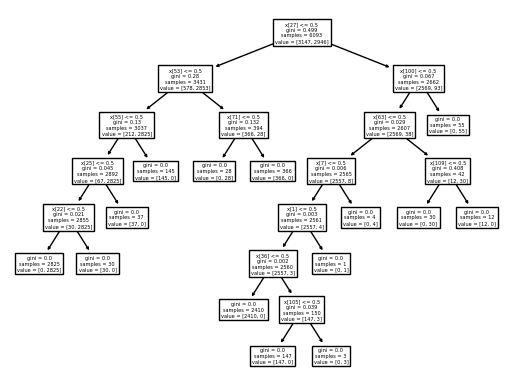

In [48]:
#write your code here
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc = dtc.fit(X_train2,y_train2)
print("Cross Val Score: ",skms.cross_val_score(dtc, 
                     X_mush, y_mush, 
                     cv=3, scoring='accuracy'))
print(tree.plot_tree(dtc))
print(dtc.feature_importances_) 
print(X_train2.columns)

In [122]:
dtc_gini = pd.DataFrame(dtc.feature_importances_) #creating a data frame of the feature importances
print("The five largest ginis belong to the following indexes: ",dtc_gini.nlargest(5,columns = 0).index.values) #nlargest code found in the following link. Used .index to get the index numbers of the 5 largest ginis and .values to only return a list of the index numbers. https://www.geeksforgeeks.org/get-n-largest-values-from-a-particular-column-in-pandas-dataframe/
print(X_train2.columns[dtc_gini.nlargest(5,columns = 0).index])#since the feature importances are displayed in the same order as the feature names, I filtered the X_train2 columns by the same indexes returned above
print("The most important features are those with the highest values in the above dtc_gini list: ",
     "odor_n, stalk-root_c,  stalk-root_r, and spore-print-color_r")

The five largest ginis belong to the following indexes:  [ 27  53  55 100  25]
Index(['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r',
       'odor_l'],
      dtype='object')
The most important features are those with the highest values in the above dtc_gini list:  odor_n, stalk-root_c,  stalk-root_r, and spore-print-color_r


## Part 2 - Support Vector Machine
### Question 2

For this question, we're going to use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.  Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

**Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.**

The initialized unfitted classifier object we'll be using is a Support Vector Classifier with linear kernel. 

With this classifier, and the dataset in X_subset, y_subset, explore the effect of `C` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 8 values of `C` from `0.0001` to `1000`. Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter.  In this case, we want to use "accuracy" as the scoring metric.

For each level of `C`, make `validation_curve` fit 5 models on different subsets of the data, returning two 8x5 (8 levels of C x 5 fits per level) arrays of the scores for the training and test sets.

*You can use "training_scores, test_scores = tt[0].mean(axis=1),tt[1].mean(axis=1)" to output the mean score across the five models for each level of `C` for both arrays, where tt is the "validation_curve" object.


In [133]:
#write your code here:
cs = [0.0001, 0.001, 0.01, .1, 1.0, 10, 100, 1000]
tt = skms.validation_curve(svm.SVC(kernel='linear'), 
                          X_subset, y_subset,
                           param_name='C',
                           param_range=cs,
                           cv=5)

def sk_graph_to_tidy(train_test_scores, # y values
                     eval_points,       # x values
                     eval_label,        # x column name
                     num_folds):        # could be inferred
    train_scores, test_scores = train_test_scores
    # humph, didn't know np_cartesian was order sensitive
    labels = np_cartesian_product(eval_points,
                                  [0,1], # surrogates for train/test
                                  np.arange(num_folds))
    score = np.concatenate([train_scores.flatten(),
                            test_scores.flatten()], axis=0)

    df = pd.DataFrame.from_records(labels)
    df.columns = [eval_label, 'set', 'fold']
    df.set = df.set.replace({0:'Train', 1:'Test'})
    df['score'] = score
    return df

def np_cartesian_product(*arrays):
    ndim = len(arrays)
    return np.stack(np.meshgrid(*arrays), axis=-1).reshape(-1, ndim)

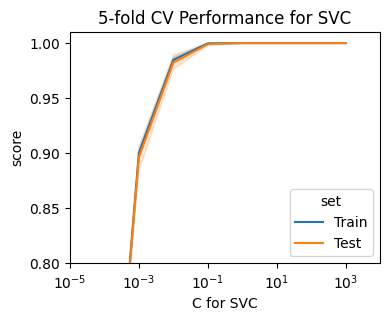

In [134]:
fig,ax = plt.subplots(1,1,figsize=(4,3))

tidy_df = sk_graph_to_tidy(tt, cs, 'c', 5)
ax = sns.lineplot(x='c',y='score',hue='set',data=tidy_df)

ax.set_title('5-fold CV Performance for SVC')
ax.set_xlabel("\n".join([r'C for SVC']))
ax.set_ylim(.8, 1.01)
ax.set_xlim(.00001, 10001)
ax.set_xscale('log')

### Question 3

Load the 'carvana' dataset (data dictionary is also uploaded) and: 
<br> (a) Choose at least 8 features (quantitative variables) and perform train test split appropriately.**Note: some of the columns might contain missing values, you can remove the rows which contain NA**.
<br> (b) Train a logisitic regression classifier (using default parameter setting) to predict whether the kicked vehicle was an avoidable purchase. Since the scale of features are varying and pretty large, it's better to standardize the training features by using "pipeline.make_pipeline(scaler, model)" as the model object. But this is not a must. 
<br> (c) After you train the logisitic regression classifier and generate predictions, create a heatmap using confusion matrix as the input. Evaluate the performance of this classifier. 

In [136]:
#write your code here:
carvana_df = pd.read_csv('carvana.csv')

In [139]:
carvana_df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [163]:
carvana_df = carvana_df.dropna()
carvana_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
275,276,0,10/4/2010,ADESA,2003,7,HYUNDAI,ACCENT,GL,4D SEDAN GL,...,5332.0,6887.0,NO,GREEN,5546,33619,FL,4500.0,0,1054
290,291,0,10/11/2010,ADESA,2005,5,CHEVROLET,1500 SILVERADO PICKU,Bas,REG CAB 4.3L,...,9264.0,11033.0,NO,GREEN,19638,33619,FL,7100.0,0,905
297,298,0,10/18/2010,ADESA,2006,4,CHEVROLET,EQUINOX FWD V6,LS,4D SUV LS,...,11543.0,13228.0,NO,GREEN,5546,33619,FL,8950.0,0,1215
305,306,0,10/25/2010,ADESA,2004,6,CHRYSLER,PT CRUISER,Bas,4D SEDAN,...,6691.0,7438.0,NO,GREEN,5546,33619,FL,4600.0,0,1389
314,315,0,10/25/2010,ADESA,2002,8,MERCURY,SABLE,LS,4D SEDAN LS PREMIUM,...,5816.0,6883.0,NO,GREEN,5546,33619,FL,4200.0,0,1353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72382,72414,0,12/16/2010,ADESA,2003,7,CHRYSLER,PT CRUISER,Lim,4D SEDAN LIMITED,...,6591.0,7750.0,NO,RED,19662,78227,TX,4055.0,0,2070
72384,72416,0,12/23/2010,ADESA,2003,7,DODGE,DURANGO 2WD V8,SLT,4D SUV 5.9L SLT,...,7853.0,8917.0,NO,RED,52644,78227,TX,4490.0,0,1930
72385,72417,0,12/23/2010,ADESA,2002,8,FORD,FOCUS,SE,4D SEDAN SE,...,5411.0,6523.0,NO,RED,52644,78227,TX,3690.0,0,1455
72386,72418,0,12/23/2010,ADESA,2004,6,CHRYSLER,SEBRING V6,GTC,2D CONVERTIBLE GTC,...,7543.0,8653.0,NO,RED,52644,78227,TX,4590.0,0,1485


In [164]:
car_features = pd.DataFrame(carvana_df,columns=['VehicleAge','MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice'])
car_features = car_features.dropna()
car_target = pd.DataFrame(carvana_df,columns=['IsBadBuy'])

In [165]:
car_features.isnull().sum()

VehicleAge                           0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
dtype: int64

In [166]:
X_train, X_test, y_train, y_test = train_test_split(
...     car_features, car_target, test_size=0.25, random_state=0)

In [189]:
from sklearn.linear_model import LogisticRegression
LogisticRegr = LogisticRegression()
LogisticRegr.fit(X_train,y_train.values.ravel()) # found from https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
LogisticRegr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

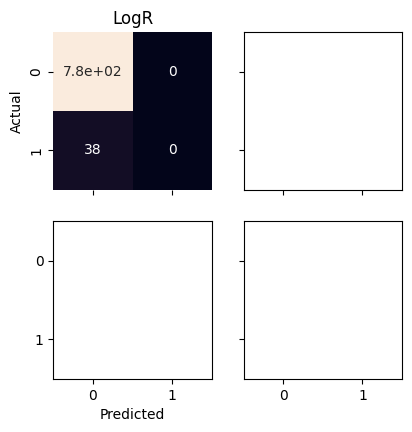

In [202]:
methods = [LogisticRegr]
names = ["LogR"]
    
fig, axes = plt.subplots(2,2, figsize=(4.5, 4.5),
                         sharex=True, sharey = True)
for ax, model, name in zip(axes.flat, methods, names):
    preds = (model.fit(X_train, y_train.values.ravel())
                  .predict(X_test))
    cm = metrics.confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, cbar=False, ax=ax)
    ax.set_title(name)

axes[0,0].set_ylabel('Actual')
axes[1,0].set_xlabel('Predicted');

In [ ]:
#The above heatmap showed that the model perfectly predicted whether or not the car was a bad buy. 